# Segundo metodo 

$$
y_{n+1} = y_n + h f(x_n,y_n) + \frac{h^2}{2} \left ( \frac{\partial f}{\partial x} + \frac{\partial f}{\partial y} f \right )
$$

donde $f$ y sus parciales estan evaluadas $f(x_n,y_n)$

In [15]:
from pylab import *
%matplotlib inline

In [44]:
def segundo_orden(ec_diff,p_ini,t_final,jac_ec,h=0.1):    #el metodo de integracion que vemos es a segundo orden
    tiempo = arange(0,t_final+h,h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1] = y[i] + h*ec_diff(y[i],tiempo[i])
        y[i+1] += 0.5*h*h*jac_ec(y[i],tiempo[i])[0] #componente 0
        y[i+1] += 0.5*h*h*jac_ec(y[i],tiempo[i])[1]*ec_diff(y[i],tiempo[i])#componente 1 y ecuacion diferencial
    return tiempo,y


In [45]:
def euler1(ec_diff,p_ini,t_final,h=0.1):
    tiempo = arange(0,t_final+h,h)
    y = zeros(len(tiempo))
    y[0] = p_ini
    for i in range(len(tiempo)-1):
        y[i+1]= y[i] + h*ec_diff(y[i],tiempo[i])   
    return tiempo,y   

In [39]:
def ec_dif(y,x):    #definimos una ecuacion diferencial de prueba
    return x*sin(y)


def d_ec_dif(y,x):
    return sin(y), x*cos(y)

In [9]:
d_ec_dif(pi/4,2)

(0.70710678118654746, 1.4142135623730951)

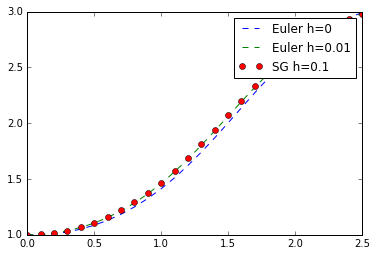

In [50]:
y_euler = euler1(ec_dif,1,2.5)
y_euler_01 = euler1(ec_dif,1,2.5,0.01)
y_seg = segundo_orden(ec_dif,1,2.5,d_ec_dif)
plot(y_euler[0],y_euler[1],'--',label="Euler h=0")
plot(y_euler_01[0],y_euler_01[1],'--',label="Euler h=0.01")
plot(y_seg[0],y_seg[1],'o',label="SG h=0.1")
legend()     
show()